In [1]:
import pandas as pd,numpy as np,matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
df_hp = pd.read_csv('House Prices.csv')
df_hp

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:
df_hp.info()

In [3]:
features_na = [name for name in df_hp.columns if df_hp[name].isnull().sum()>1]
features_na

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [4]:
for feature_na in features_na:
    print('{}: {} % missing values'.format(feature_na,df_hp[feature_na].isnull().mean()*100))

LotFrontage: 17.73972602739726 % missing values
Alley: 93.76712328767123 % missing values
MasVnrType: 0.547945205479452 % missing values
MasVnrArea: 0.547945205479452 % missing values
BsmtQual: 2.5342465753424657 % missing values
BsmtCond: 2.5342465753424657 % missing values
BsmtExposure: 2.6027397260273974 % missing values
BsmtFinType1: 2.5342465753424657 % missing values
BsmtFinType2: 2.6027397260273974 % missing values
FireplaceQu: 47.26027397260274 % missing values
GarageType: 5.5479452054794525 % missing values
GarageYrBlt: 5.5479452054794525 % missing values
GarageFinish: 5.5479452054794525 % missing values
GarageQual: 5.5479452054794525 % missing values
GarageCond: 5.5479452054794525 % missing values
PoolQC: 99.52054794520548 % missing values
Fence: 80.75342465753424 % missing values
MiscFeature: 96.30136986301369 % missing values


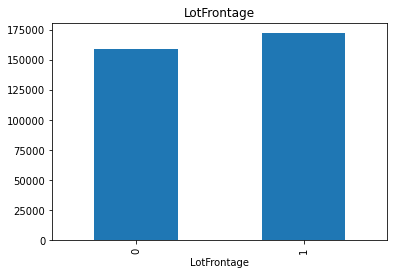

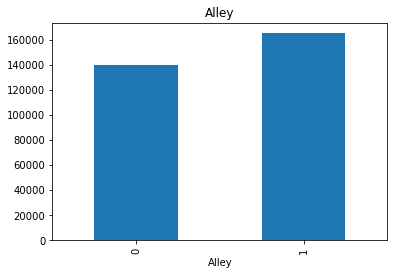

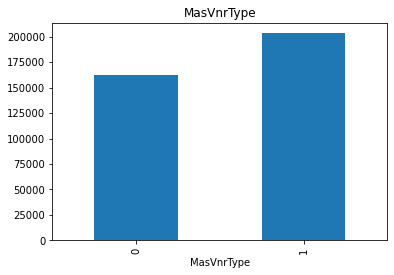

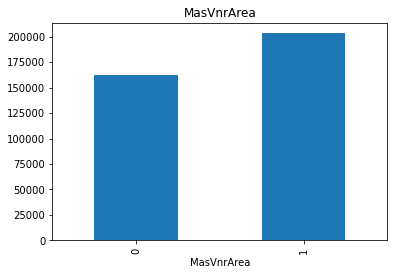

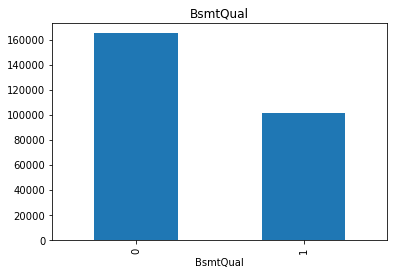

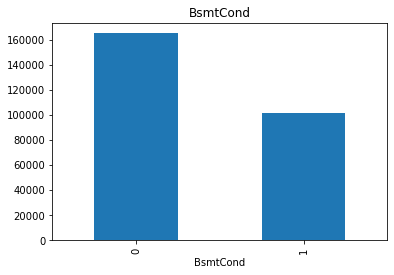

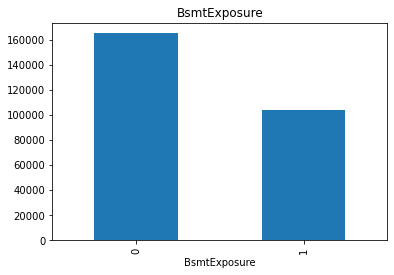

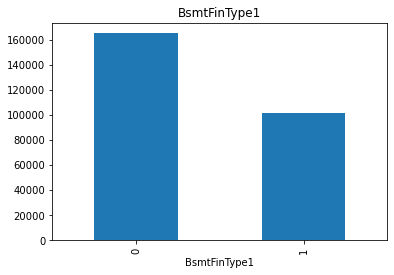

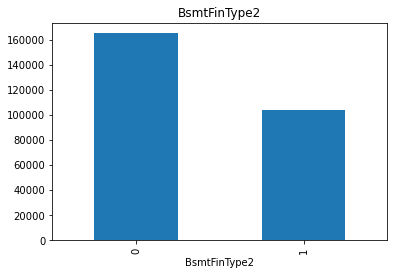

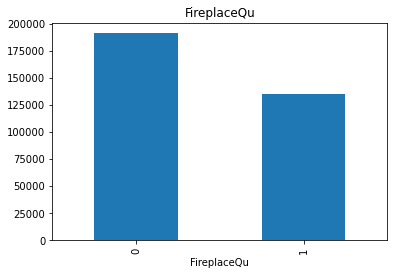

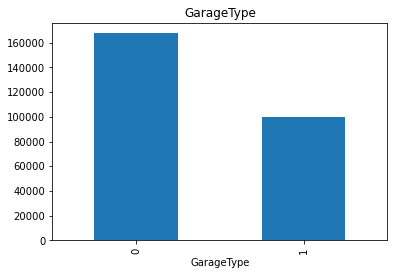

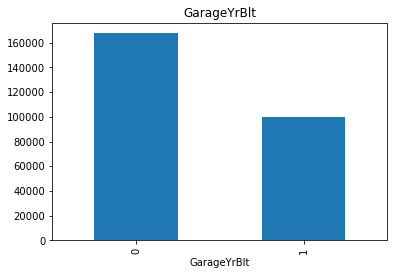

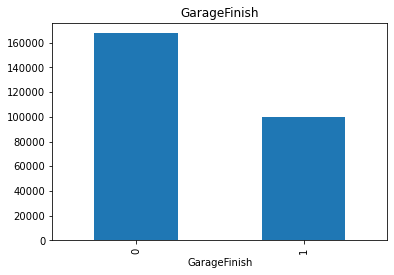

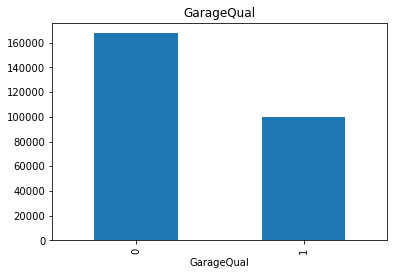

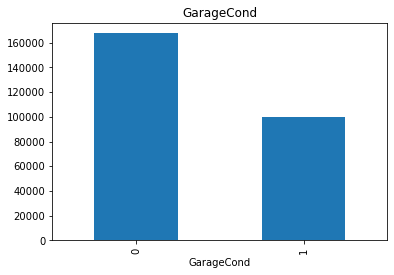

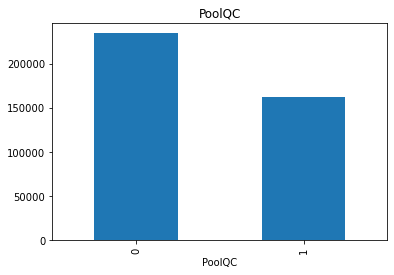

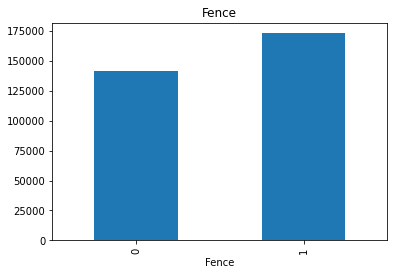

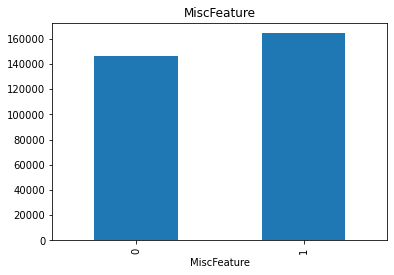

In [5]:
for feature_na in features_na:
    data_hp = df_hp.copy()
    data_hp[feature_na] = np.where(data_hp[feature_na].isnull(),1,0)
    
    data_hp.groupby(feature_na)['SalePrice'].median().plot.bar()
    plt.title(feature_na)
    plt.show()

In [7]:
df_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
numerical_variables = [feature_numerical for feature_numerical in df_hp.columns if df_hp[feature_numerical].dtype != 'O']
numerical_variables

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [7]:
year_feature = [feature for feature in numerical_variables if 'Y' in feature]
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

Text(0, 0.5, 'Giá nhà')

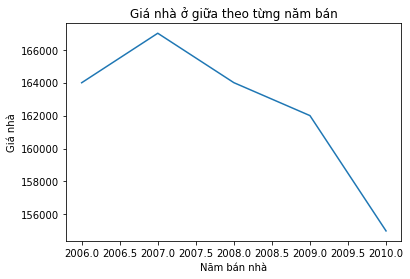

In [8]:
df_hp.groupby('YrSold')['SalePrice'].median().plot()
plt.title('Giá nhà ở giữa theo từng năm bán')
plt.xlabel('Năm bán nhà')
plt.ylabel('Giá nhà')

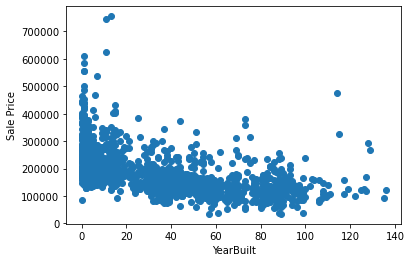

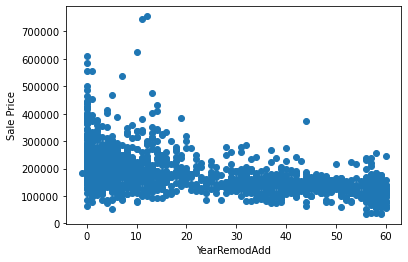

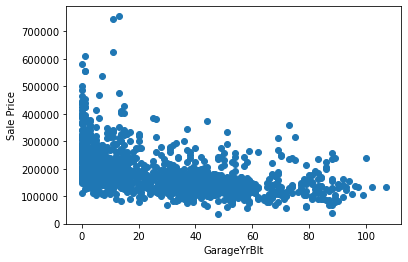

In [11]:
for feature in year_feature:
    if feature != 'YrSold':
        data = df_hp.copy()
        data[feature] = data['YrSold']-data[feature]
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('Sale Price')
        plt.show()

In [9]:
discrete = [feature for feature in numerical_variables if df_hp[feature].nunique()<25 and feature not in year_feature + ['Id']]
discrete

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

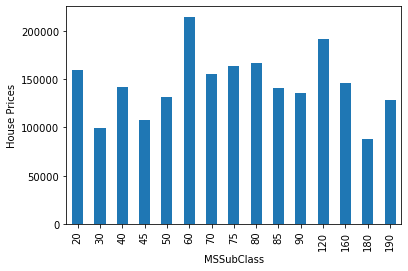

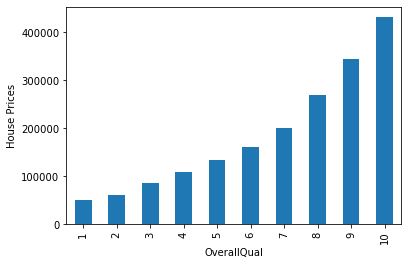

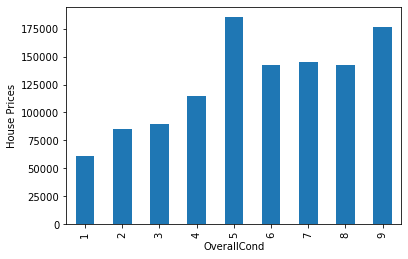

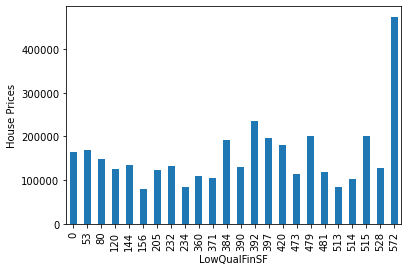

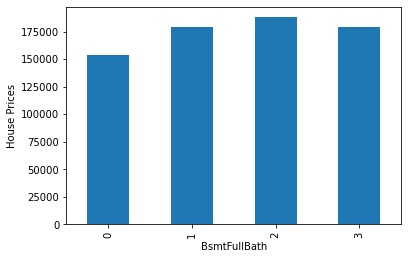

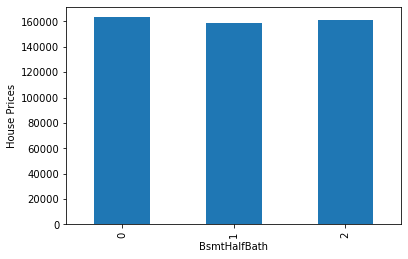

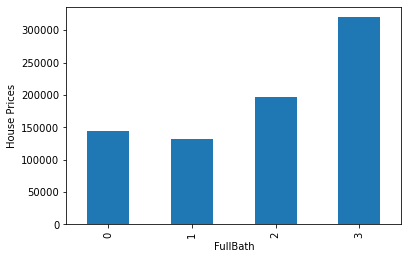

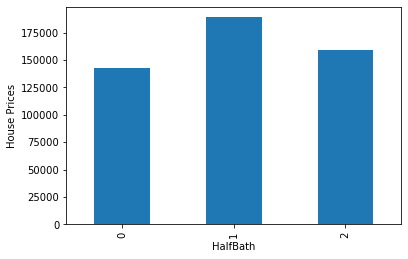

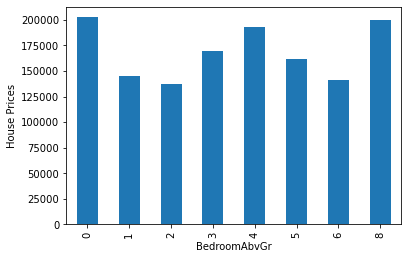

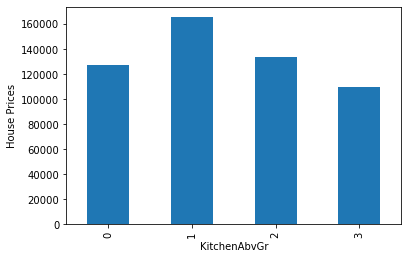

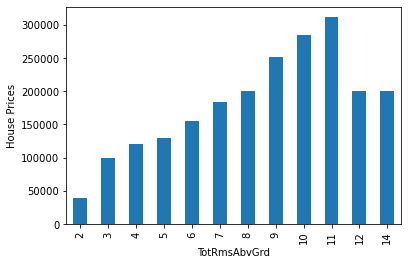

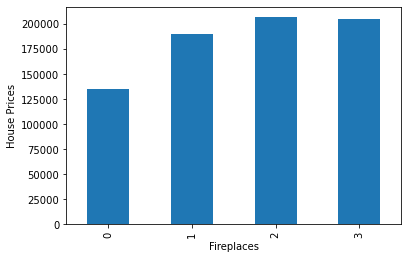

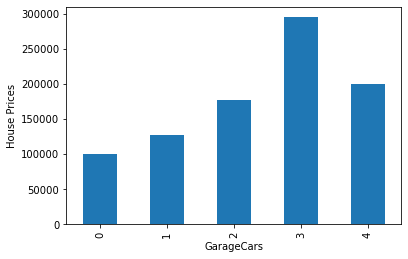

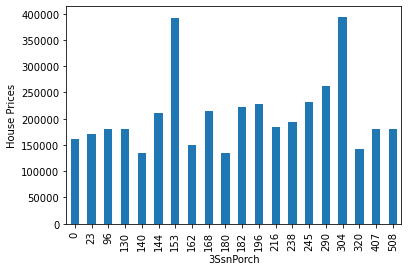

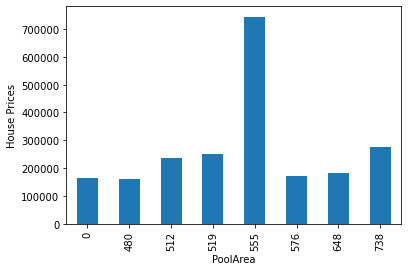

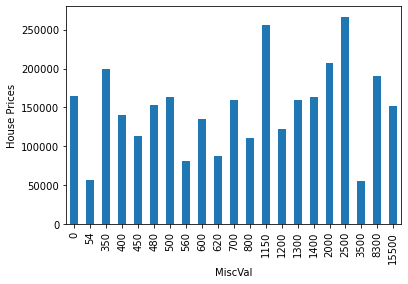

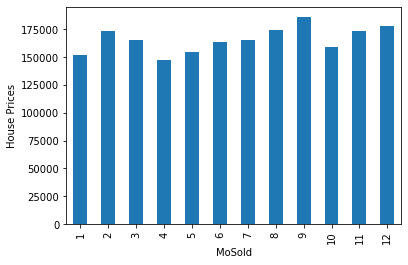

In [10]:
for featuree in discrete:
    data = df_hp.copy()
    
    data.groupby(featuree)['SalePrice'].median().plot.bar()
    plt.xlabel(featuree)
    plt.ylabel('House Prices')
    plt.show()

In [11]:
continuous = [feature for feature in numerical_variables if feature not in discrete + year_feature + ['Id']]
continuous

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [12]:
df_hp[continuous].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   MasVnrArea     1452 non-null   float64
 3   BsmtFinSF1     1460 non-null   int64  
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   GrLivArea      1460 non-null   int64  
 10  GarageArea     1460 non-null   int64  
 11  WoodDeckSF     1460 non-null   int64  
 12  OpenPorchSF    1460 non-null   int64  
 13  EnclosedPorch  1460 non-null   int64  
 14  ScreenPorch    1460 non-null   int64  
 15  SalePrice      1460 non-null   int64  
dtypes: float64(2), int64(14)
memory usage: 182.6 KB


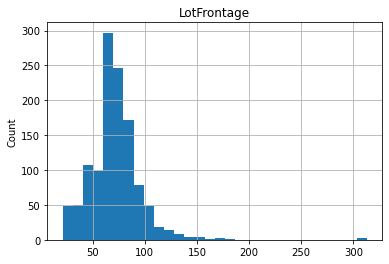

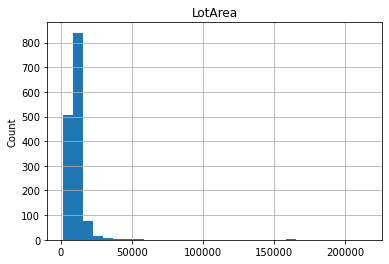

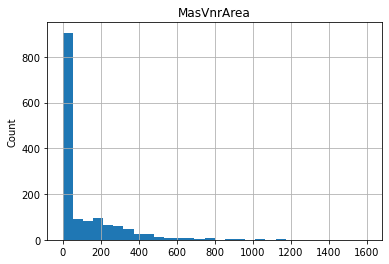

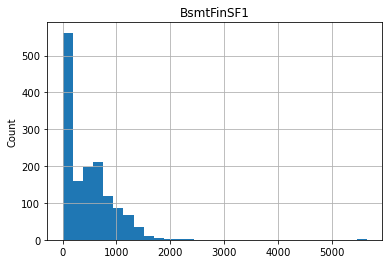

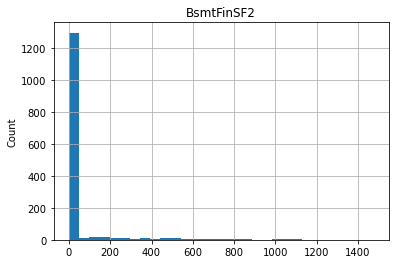

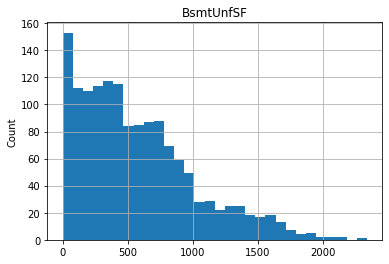

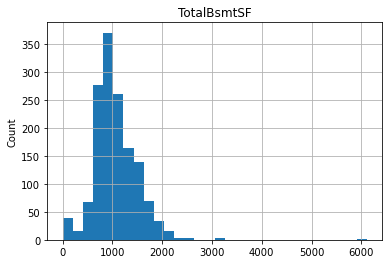

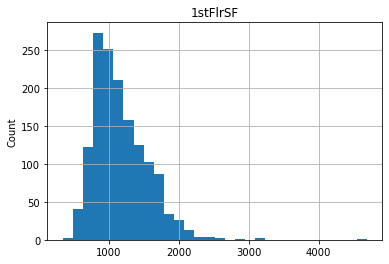

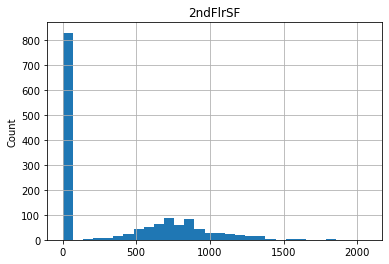

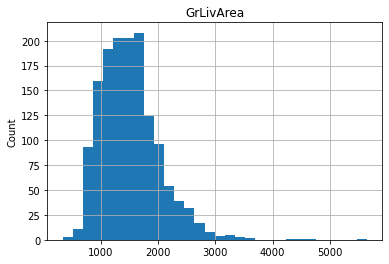

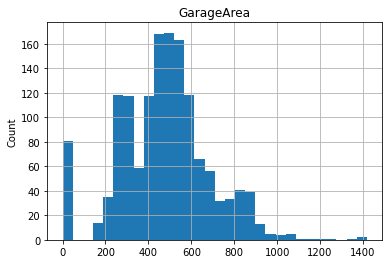

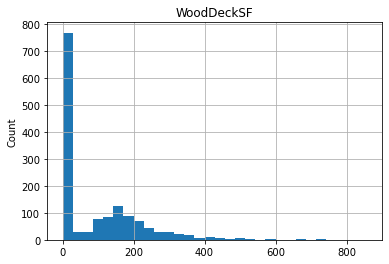

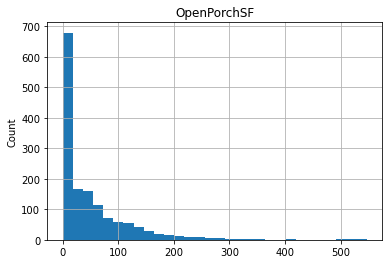

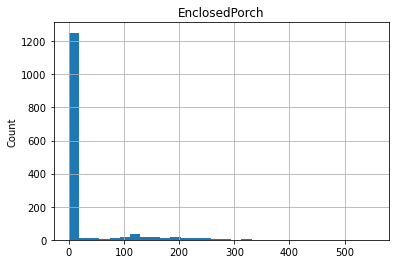

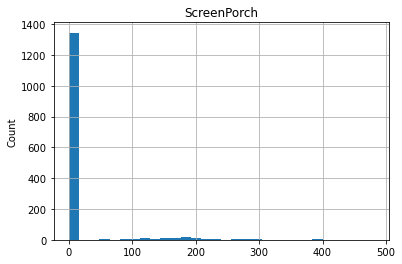

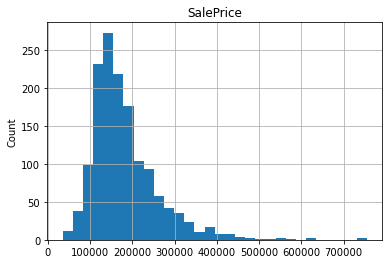

In [13]:
for feature in continuous:
    data = df_hp.copy()
    
    data[feature].hist(bins=30)
    plt.title(feature)
    plt.ylabel('Count')
    plt.show()

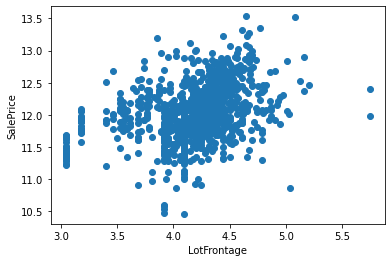

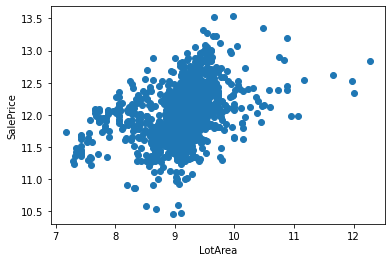

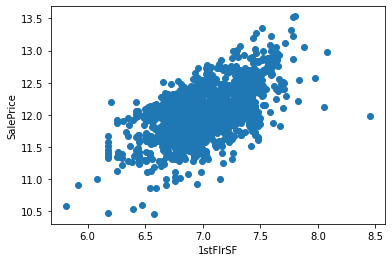

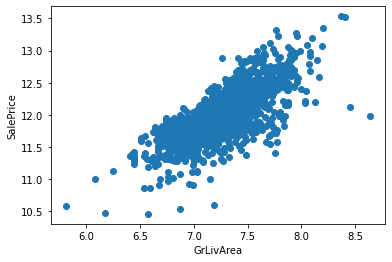

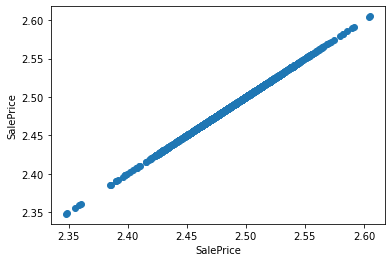

In [30]:
for feature in continuous:
    data = df_hp.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        
        data['SalePrice'] = np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

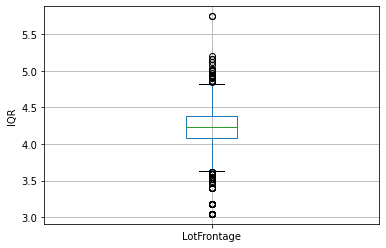

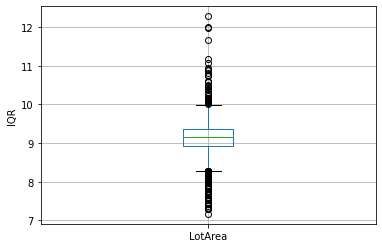

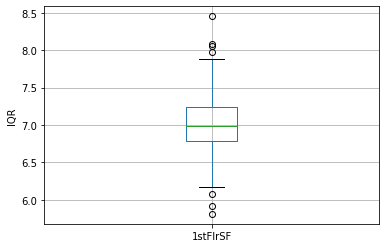

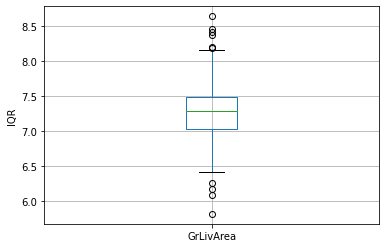

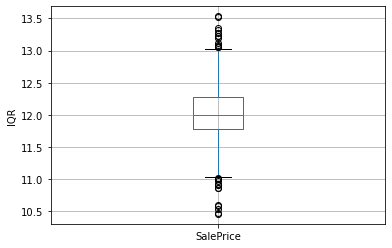

In [14]:
for feature in continuous:
    data = df_hp.copy()
    
    if 0 in data[feature].unique():
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel('IQR')
        plt.show()

In [16]:
categorical_feature = [feature for feature in data.columns if data[feature].dtype=='O']
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [17]:
### Nếu dùng len của unique thì nó vẫn đếm giá trị NaN, còn dùng nunique thì nó không đếm giá trị NaN
for categorical in categorical_feature:
    print('{}:{}'.format(categorical,df_hp[categorical].nunique()))

MSZoning:5
Street:2
Alley:2
LotShape:4
LandContour:4
Utilities:2
LotConfig:5
LandSlope:3
Neighborhood:25
Condition1:9
Condition2:8
BldgType:5
HouseStyle:8
RoofStyle:6
RoofMatl:8
Exterior1st:15
Exterior2nd:16
MasVnrType:4
ExterQual:4
ExterCond:5
Foundation:6
BsmtQual:4
BsmtCond:4
BsmtExposure:4
BsmtFinType1:6
BsmtFinType2:6
Heating:6
HeatingQC:5
CentralAir:2
Electrical:5
KitchenQual:4
Functional:7
FireplaceQu:5
GarageType:6
GarageFinish:3
GarageQual:5
GarageCond:5
PavedDrive:3
PoolQC:3
Fence:4
MiscFeature:4
SaleType:9
SaleCondition:6


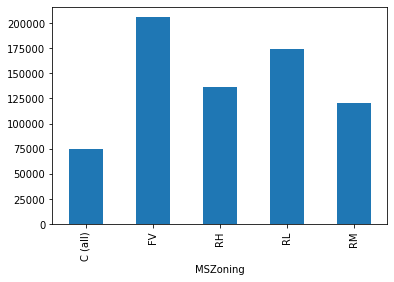

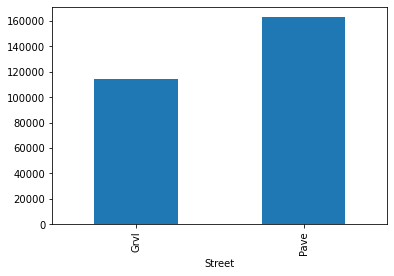

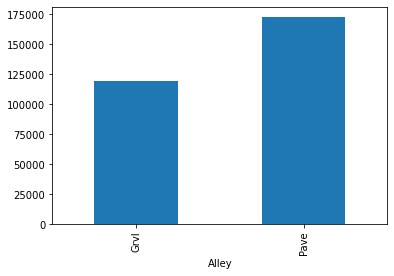

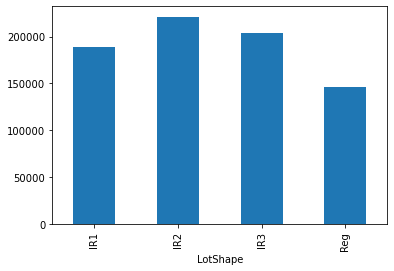

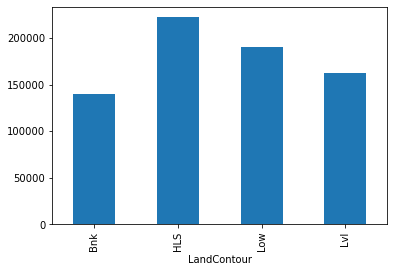

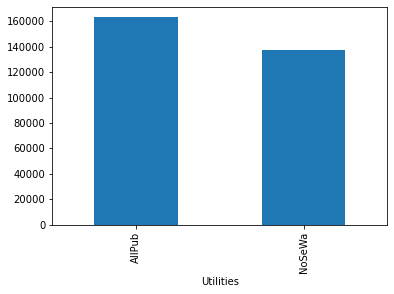

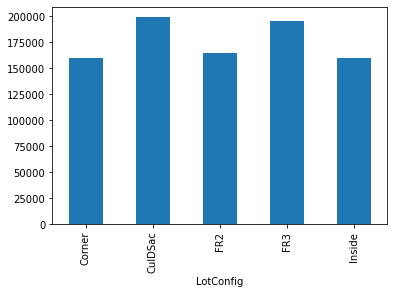

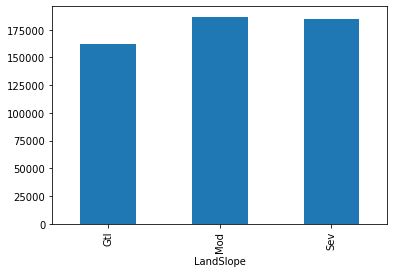

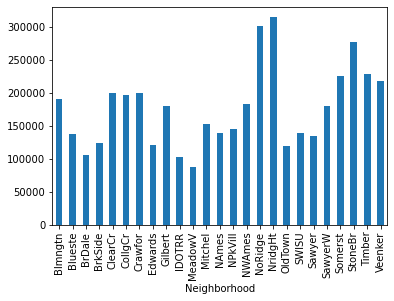

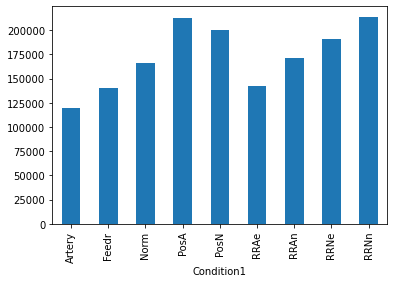

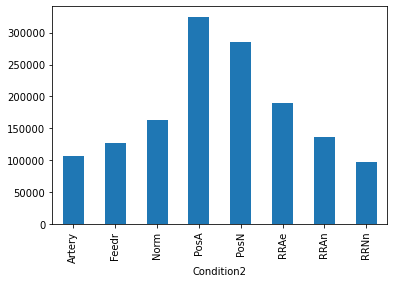

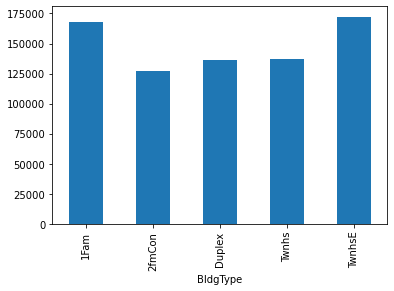

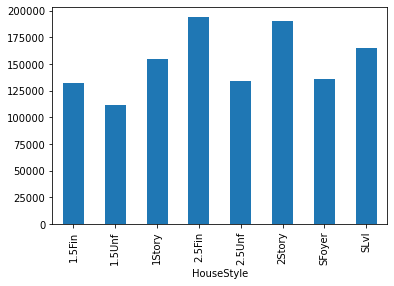

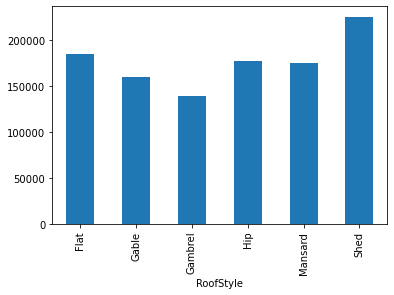

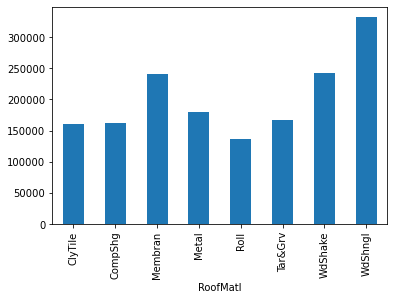

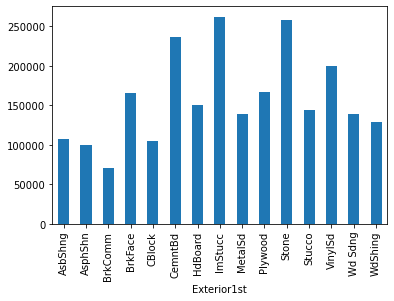

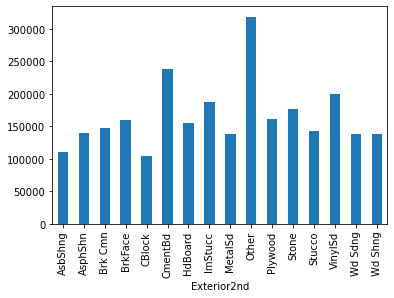

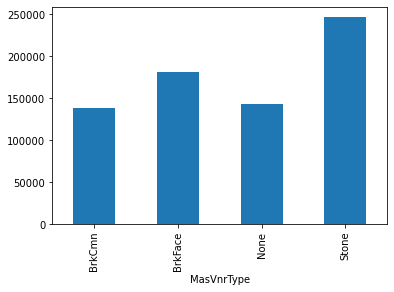

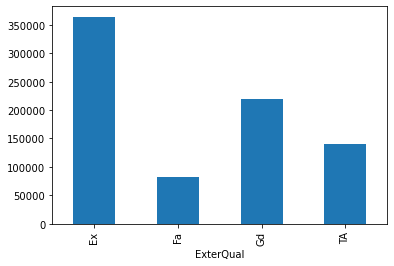

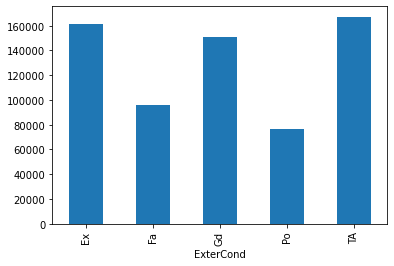

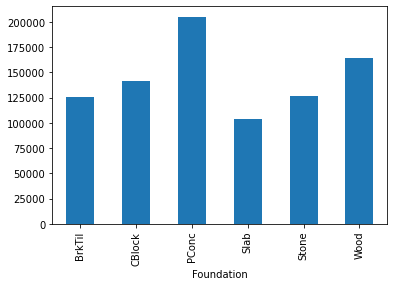

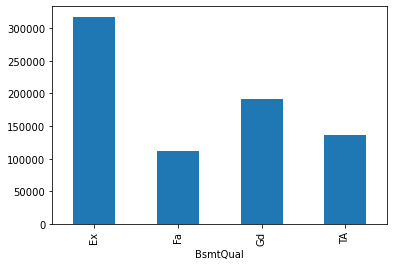

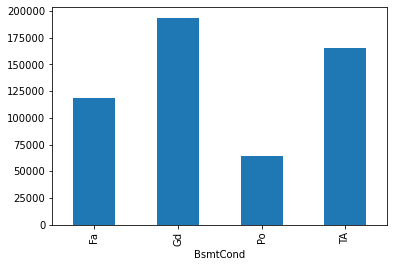

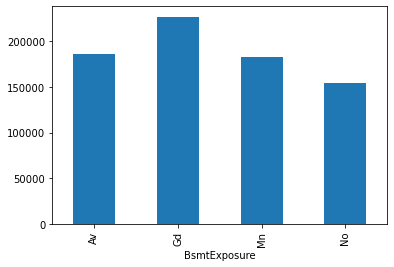

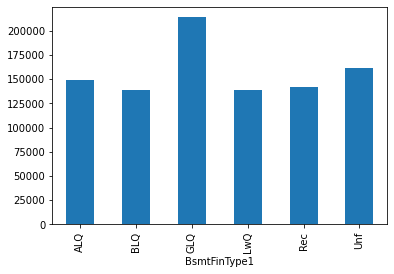

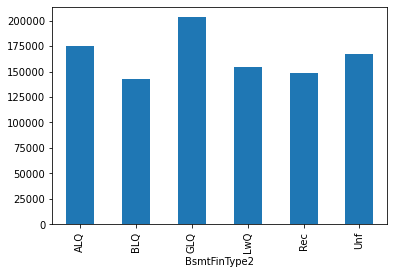

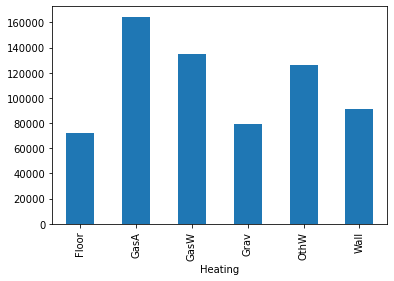

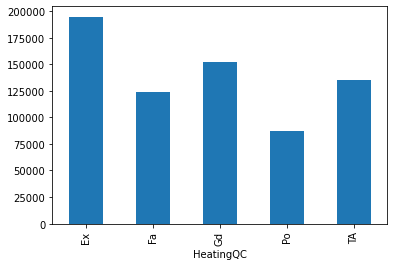

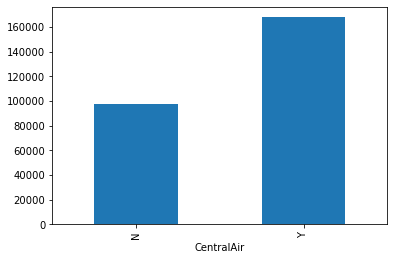

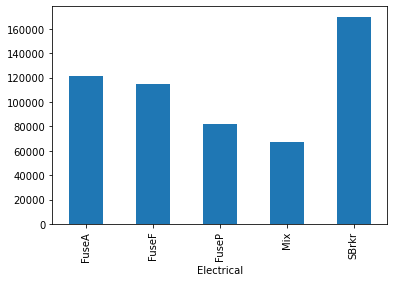

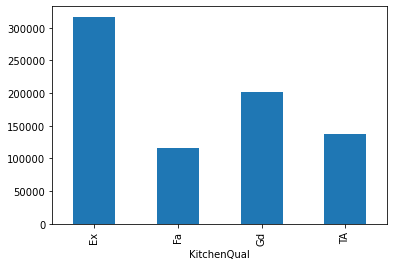

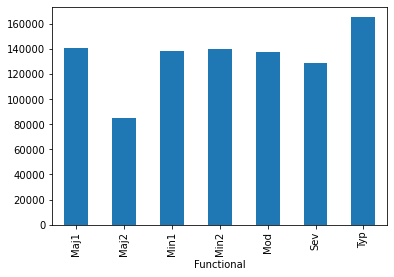

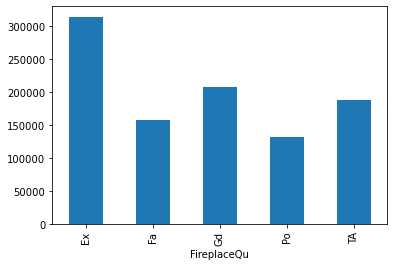

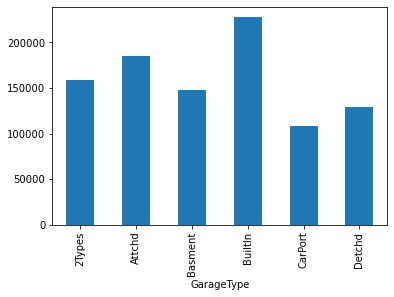

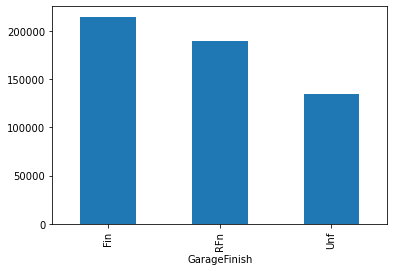

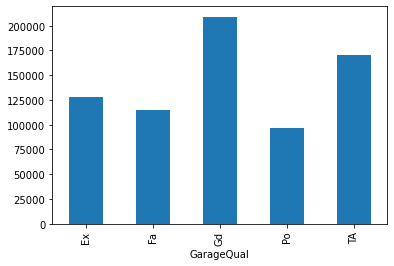

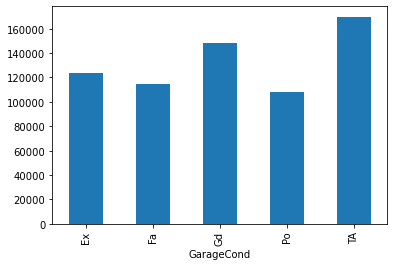

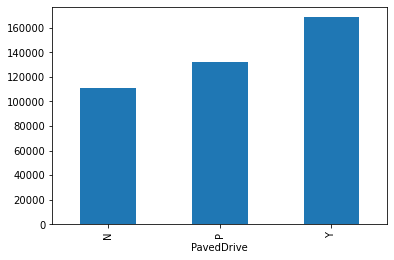

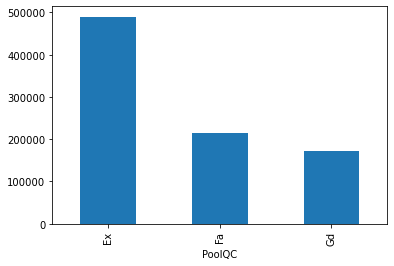

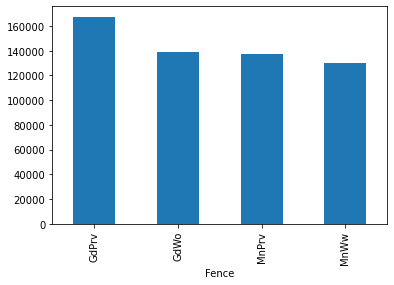

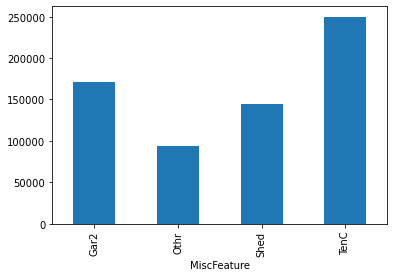

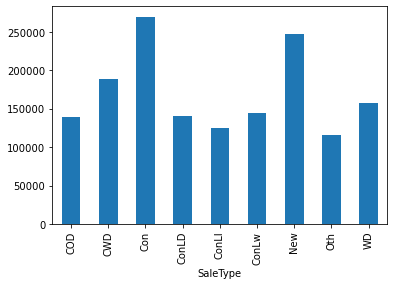

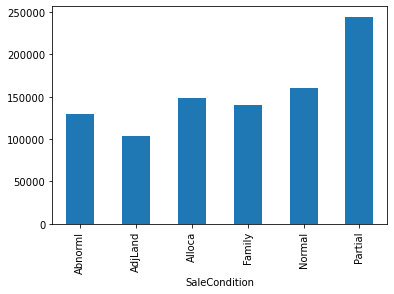

In [18]:
for feature in categorical_feature:
    data = df_hp.copy()
    
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.show()